<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/datasets/insurance.csv")

In [3]:
display(df.head(10))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Приведем типы признаков 'Возраст','Зарплата' к целочисленным.

In [6]:
df[['Возраст','Зарплата']] = df[['Возраст','Зарплата']].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [8]:
display(df.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


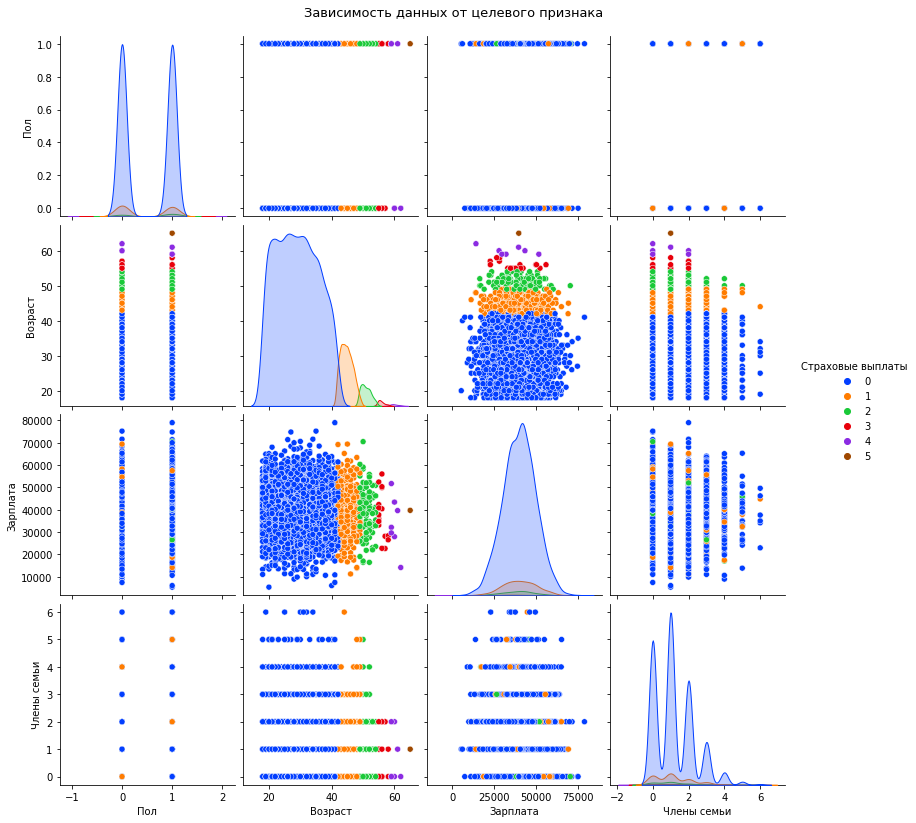

In [9]:
sns.pairplot(df,hue = "Страховые выплаты", height=2.8, palette='bright')#
plt.suptitle("Зависимость данных от целевого признака", y=1.02, fontsize=13)
plt.show()

Посмотрим визуально, как коррелируют признаки между собой . Видим, что  наиболее целевой признак "Страховые выплаты" связан с признаком "Возраст". 

In [10]:
corr = df.corr()

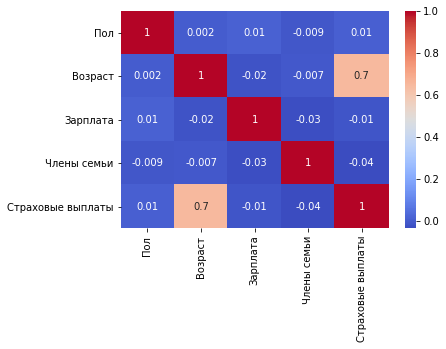

In [11]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g',cmap= 'coolwarm');

Данные загружены и не имеют аномалий. Привели типы признаков 'Возраст','Зарплата' к целочисленным. Корреляция между признаками отсутствует, за исключением признаков "Страховые выплаты" и "Возраст", которые сильно взаимосвязаны.

## Умножение матриц

В этом проекте нам необходимо решить следующую задачу:

 - **Как для защиты зашифровать данные, чтобы качество модели машинного обучения при использовании этих данных не изменилось?**

Постараемся доказать что, если умножить признаки (матрица Х) на обратимую матрицу (матрица P) и тем самым защифровать данные, качество модели регрессии для предсказаний не изменится.

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц, сдвиг w0 умножится на этот столбец и формула предсказания примет вид описанный ниже)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Предсказания:**

$$
a = Xw 
$$ Bектор предсказаний линейной регресии(a) равен произведению матрицы признаков(X) на вектор весов(w) 

**Задача обучения - найти вектор w и число w0:**

$$
w = \arg\min_w MSE(Xw, y)
$$
Функция argmin() находит минимум MSE и возвращает, при каком аргументе он был достигнут. 

**Формула обучения:**

Минимальное значение MSE получается, когда веса равны этой величине:

$$
w = (X^T X)^{-1} X^T y
$$
 - Транспонированная матрица признаков умножается на себя;
 - Вычисляется обратная к результату матрица;
 - Обратная умножается на транспонированную матрицу признаков;
 - Результат умножается на вектор значений целевого признака.



**Обоснование:** ...

$$a' = XPw'$$ , где a' - вектор предсказаний линейной регрессии после умножения на произвольную обратимую матрицу P

$$ w' =  ((XP)^T (XP))^{-1} (XP)^T y$$  

$$a' = XP((XP)^T) (XP))^{-1} (XP)^T y $$

Упроситим формулу используя принцип ассоциативности $$(A(BC) = (AB)C)$$ и факт того, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке $$(AB)^T=B^TA^T$$
так же помним что $$PP^{-1} = E$$, где E - единичная матрица и умножение на нее ничего не меняет $$AE=EA=A$$.

Формула вектора предсказаний после умножения матрицы признаков на обратимую матрицу будет выгдядеть следующим образом:
$$a' = XPP^{-1}X^{-1}(P^TX^T)^{-1}P^TX^Ty = XEX^{-1}(X^T)^{-1}(P^T)^{-1}P^TX^Ty = XX^{-1}(X^T)^{-1}EX^Ty$$

$$a' =  XX^{-1}(X^T)^{-1}X^Ty = X(X^TX)^{-1}X^Ty = Xw =a$$

В итоге мы видим, что **изменение качества предсказания линейной регрессии не происходит при умножении признаков исходных данных, на обратимую матрицу**, т.к. параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится. 

Теперь можно уверенно применить этот принцип на практике


## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайным образом.

Этапы алгоритма:

- Составляем произвольную матрицу 

- Проверяем матрицу на обратимость.

- Получаем матрицу преобразованных признаков умножением исходной матрицы на обратимую 

- Ищем метрики качества модели линейной регрессии из библиотеки sklearn и  на исходных данных и на преобразованных

- Описываем вывод полученных результатов

**Обоснование**

Eсли мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. 

## Проверка алгоритма

Выделяем в отдельные датафреймы признаки и целевой признак исходных данных

In [12]:
features=df.drop(['Страховые выплаты'],axis=1)
target=df['Страховые выплаты']

Делим исходный датасет на тренировочную и тестовую выбоки в соотношении 75%/25%

In [13]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

print('Выборка train- {:.0%}'.format(features_train.shape[0]/features.shape[0]))
print('Выборка test- {:.0%}'.format(features_test.shape[0]/features.shape[0]))

features_train.columns[:]

Выборка train- 75%
Выборка test- 25%


Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи'], dtype='object')

In [14]:
model = LinearRegression()
model.fit(features_train, target_train)
predict = model.predict(features_test)


R2_score = r2_score(target_test,predict)
MSE = mean_squared_error(predict,target_test)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.44
MSE: 0.12


Создаю произвольную матрицу P размерностью n*n 
, где n - количество признаков для регрессии.Таким образом матрица после умножения 
 будет иметь туже размерность, что и матрица до умножения.

In [15]:
P=np.random.normal(size=(4,4))
print(P)

[[-0.23458842  1.49488794 -1.52158754  0.75843779]
 [-2.04072225  0.70168173 -1.34430462  1.44411468]
 [ 0.83083521  1.07692371 -0.24525949  0.06052558]
 [ 0.7808141   0.48853612 -0.02670159 -0.38377128]]


Проверяю созданную матрицу на обратимость с помощью np.linalg.inv() в Python — это библиотечная функция numpy, которая вычисляет обратную (мультипликативную) матрицу. 

In [16]:
P0=np.linalg.inv(P)
print(P0)

[[ 1.48372919 -1.72690436  0.63766912 -3.46544004]
 [-1.6571822   1.68741895  0.68563192  3.1827685 ]
 [-1.99179622  1.20175643  1.60148403  0.83839348]
 [ 1.04777882 -1.44907915  2.05876485 -5.66314778]]


Обратная сформированная матрица, дает единичную матрицу при умножении на исходную матрицу.

In [17]:
print(P0.dot(P))

[[ 1.00000000e+00  1.01264993e-16  1.79415736e-16  6.92281286e-17]
 [-9.52003725e-17  1.00000000e+00  5.06809170e-16 -3.92322273e-17]
 [-2.08322448e-16 -1.23874552e-16  1.00000000e+00  1.32721809e-16]
 [-3.50477654e-16  5.29287977e-16 -2.51989545e-16  1.00000000e+00]]


Умножаю выборку train на обратную матрицу

In [18]:
features_train_P = features_train.dot(P)
features_train_P.columns = features_train.columns 
features_train_P

,Пол,Возраст,Зарплата,Члены семьи
3369,29989.029624,39016.793970,-8937.747001,2253.497638
1441,47786.488717,62056.157650,-14174.174688,3536.131815
571,34082.804666,44284.506752,-10123.209574,2533.429287
225,37397.982601,48595.008311,-11109.624760,2781.308070
2558,41974.479215,54516.472197,-12454.545754,3109.482652
...,...,...,...,...
3497,26584.099776,34598.721661,-7929.290489,2003.523974
3492,18805.942208,24467.769406,-5605.137806,1412.830820
2177,37055.210319,48169.242125,-11019.764074,2765.076849
3557,41583.071184,53971.268916,-12317.182061,3062.567057


Умножаю выборку test на обратную матрицу

In [19]:
features_test_P = features_test.dot(P)
features_test_P.columns = features_test.columns 
features_test_P

,Пол,Возраст,Зарплата,Члены семьи
3183,32338.352454,42025.134255,-9609.589050,2406.618367
1071,35708.522892,46451.472976,-10637.952742,2680.090742
2640,34898.339414,45367.348584,-10379.374084,2605.205880
2282,28872.250722,37490.978675,-8561.916416,2135.172520
1595,33152.861882,43107.671417,-9865.602979,2478.696866
...,...,...,...,...
982,23991.471177,31269.045262,-7182.659796,1828.882599
3820,48040.122444,62379.998689,-14246.488336,3551.694061
3595,35072.669344,45579.926599,-10423.048764,2611.534537
3513,34239.793416,44503.704573,-10179.133576,2552.453071


Обучаем модель и предсказываем целевой признак на защифрованных с помощью умножения входных данных на обратную матрицу.

In [20]:
model = LinearRegression()
model.fit(features_train_P, target_train)
predict_P = model.predict(features_test_P)


R2_score_P = r2_score(target_test,predict_P)
MSE_P = mean_squared_error(predict_P,target_test)

print("R2_score:", R2_score_P.round(2))
print("MSE:", MSE_P.round(2))

R2_score: 0.44
MSE: 0.12


**ВЫВОД:** Модель ведет себя одинаково как на исходных данных, так и на зашифрованных.
Метрики качества модели до шифровки данных и после не изменились: R2_score: 0.44
MSE: 0.12. Визуально посмотрим как графически выглядит линейная регрессия в обеих случаях.

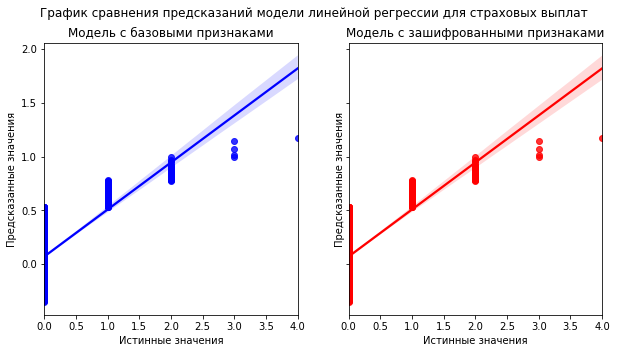

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
fig.suptitle('График сравнения предсказаний модели линейной регрессии для страховых выплат') 

axes[0].set_title('Модель c базовыми признаками')
axes[0].set_ylabel('Предсказанные значения')
sns.regplot(target_test,predict, ax = axes[0],color='b')
axes[0].set_xlabel('Истинные значения')

axes[1].set_title('Модель c зашифрованными признаками')
axes[1].set_ylabel('Предсказанные значения')
sns.regplot(target_test,predict_P,ax = axes[1],color='r')
axes[1].set_xlabel('Истинные значения');

## Общий вывод

В результате данной работы произведены следующие действия:

- Разработан алгоритм с целью защитить данные клиентов страховой компании.
- Исходные данные были зашифрованы методом умножения признаков исходных данных на обратимую матрицу, так как предварительно были проведены математический расчеты и доказано, что качество модели машинного обучения при этом не пострадает.
- В результате исходная и изменённая шифрованием матрица признаков была использована в модели машинного обучения Линейная регрессия. По результатам предсказаний модели в обоих случаях качество предсказаний не изменилось, что подтверждает правильность использования данного метода.